## GAN from Scratch

### Import Libraries

In [2]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as T # Transformation functions to manipulate images


import torch.nn.functional as F # various activation functions for model
import torchvision # You can load various Pretrained Model from this package 
# import torchvision.datasets as vision_dsets
import torch.optim as optim # various optimization functions for model
from torch.autograd import Variable 
# from torch.utils import data

### Dataset Preprocessing

In [6]:
import os
import numpy as np

MNIST_dir = "../MNIST/"
train_imgs_dir = os.path.join(MNIST_dir, 'train-images-idx3-ubyte')
train_labels_dir = os.path.join(MNIST_dir, 'train-labels-idx1-ubyte')
test_imgs_dir = os.path.join(MNIST_dir, 't10k-images-idx3-ubyte')
test_labels_dir = os.path.join(MNIST_dir, 't10k-labels-idx1-ubyte')

b"\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x12\x12\x12~\x88\xaf\x1a\xa6\xff\xf7\x7f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e$^\x9a\xaa\xfd\xfd\xfd\xfd\xfd\xe1\xac\xfd\xf2\xc3@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x001\xee\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfb]RR8'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12\xdb\xfd\xfd\xfd\xfd\xfd\xc6\xb6\xf7\xf1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

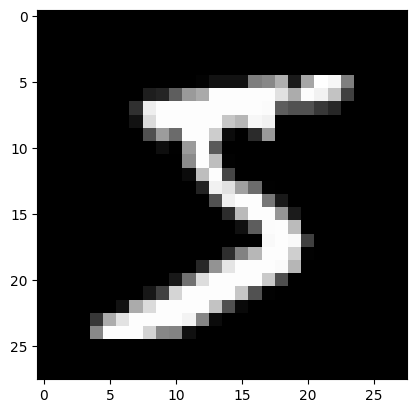

In [22]:
import struct
import matplotlib.pyplot as plt
import matplotlib.cm as cm

train_imgs_file = open(train_imgs_dir,'rb')
train_labels_file = open(train_labels_dir,'rb')
train_img = np.zeros((28,28))
train_label = -1
img = train_imgs_file.read(16)
label = train_labels_file.read(8)
idx = 0
# while True:
if idx == 0:
    img = train_imgs_file.read(28*28)
    img = np.reshape(struct.unpack(len(img)*'B',img), (28,28))
    label = train_labels_file.read(1)
    # if not (img or label):
    #     break
    # idx += 1

plt.imshow(img, cmap='gray') 
plt.show()

### Custom Dataloader

In [ ]:
# import os
import pandas as pd
from torchvision.io import read_image

class MNISTDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")